In [1]:
!gdown --id 1TXiAyqt3rHveuzdGT6YtswU1e-tBSFUe -O dataset.zip

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1TXiAyqt3rHveuzdGT6YtswU1e-tBSFUe
From (redirected): https://drive.google.com/uc?id=1TXiAyqt3rHveuzdGT6YtswU1e-tBSFUe&confirm=t&uuid=e8950ae7-ece5-4ed9-b257-0de91f9d48de
To: /content/dataset.zip
100% 3.00G/3.00G [00:38<00:00, 77.9MB/s]


In [2]:
!unzip dataset.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/SZSE/days/20180705/edge_index_industry.csv  
  inflating: dataset/SZSE/days/20180705/industry.npy  
  inflating: dataset/SZSE/days/20180705/industry_index.csv  
  inflating: dataset/SZSE/days/20180705/loss_mask.csv  
   creating: dataset/SZSE/days/20180706/
  inflating: dataset/SZSE/days/20180706/20180706.csv  
  inflating: dataset/SZSE/days/20180706/concept.npy  
  inflating: dataset/SZSE/days/20180706/edge_index_concept.csv  
  inflating: dataset/SZSE/days/20180706/edge_index_industry.csv  
  inflating: dataset/SZSE/days/20180706/industry.npy  
  inflating: dataset/SZSE/days/20180706/industry_index.csv  
  inflating: dataset/SZSE/days/20180706/loss_mask.csv  
   creating: dataset/SZSE/days/20180709/
  inflating: dataset/SZSE/days/20180709/20180709.csv  
  inflating: dataset/SZSE/days/20180709/concept.npy  
  inflating: dataset/SZSE/days/20180709/edge_index_concept.csv  
  inflating: dataset/SZSE/days/20180709/edg

In [1]:
import os
print(os.listdir("dataset"))

['._SZSE', '._SSE', 'SSE', 'SZSE']


In [2]:
import pandas as pd

# Define paths for the .csv files
index_feature_path = "dataset/SSE/index_feature_SSE.csv"
limit_feature_path = "dataset/SSE/limit_feature_SSE.csv"

# Load the CSV files
index_feature = pd.read_csv(index_feature_path)
limit_feature = pd.read_csv(limit_feature_path)

# Preview the data
print("Index Feature Data:")
print(index_feature.head(), "\n")

print("Limit Feature Data:")
print(limit_feature.head(), "\n")


Index Feature Data:
     ts_code  trade_date  pct_chg
0  600176.SH    20180102   0.1684
1  600188.SH    20180102  -0.3919
2  600353.SH    20180102   0.9387
3  600383.SH    20180102   0.1684
4  600426.SH    20180102   0.1179 

Limit Feature Data:
     ts_code  trade_date  limit_time  limit_rate  limit_mr  limit_lr  \
0  600060.SH    20210126         240    1.000000  0.100426  0.000000   
1  600063.SH    20210127         232    0.006751  0.073554  0.024389   
2  600075.SH    20210127         239    0.013492  0.093846  0.005937   
3  600099.SH    20210128          85    0.000687  0.041309  0.055682   
4  600129.SH    20210127          20    0.000454  0.017363  0.081598   

   limit_amp  limit_tor  
0   0.000000   0.376024  
1   0.062992   2.253543  
2   0.028912   0.685027  
3   0.108156   1.380659  
4   0.138113   0.686033   



In [3]:
# List to store daily data
all_daily_data = []

# Path to daily data folder
daily_data_path = "dataset/SSE/days"

# Loop through each folder and load daily files
for folder_name in sorted(os.listdir(daily_data_path)):
    folder_path = os.path.join(daily_data_path, folder_name)
    if os.path.isdir(folder_path):  # Ensure it's a folder
        daily_file = os.path.join(folder_path, f"{folder_name}.csv")
        if os.path.exists(daily_file):
            daily_data = pd.read_csv(daily_file)
            daily_data['trade_date'] = folder_name  # Add date for reference
            all_daily_data.append(daily_data)

# Combine all daily data
combined_daily_data = pd.concat(all_daily_data, ignore_index=True)

# Preview the combined daily data
print("Combined Daily Data:")
print(combined_daily_data.head())

Combined Daily Data:
     ts_code trade_date   open   high    low  close  pre_close  change  \
0  600000.SH   20180102  12.98  12.99  12.87  12.93      12.96   -0.03   
1  600000.SH   20180102  12.92  13.04  12.85  12.97      12.93    0.04   
2  600000.SH   20180102  12.97  12.97  12.74  12.75      12.97   -0.22   
3  600000.SH   20180102  12.80  12.81  12.63  12.74      12.75   -0.01   
4  600000.SH   20180102  12.79  12.79  12.66  12.69      12.74   -0.05   

   pct_chg        vol      amount  
0    -0.23  312962.21  404411.517  
1     0.31  366499.02  474566.888  
2    -1.70  303700.97  390113.096  
3    -0.08  193453.38  246331.123  
4    -0.39  161416.78  205219.487  


In [4]:
print(combined_daily_data.dtypes)
print(limit_feature.dtypes)

ts_code        object
trade_date     object
open          float64
high          float64
low           float64
close         float64
pre_close     float64
change        float64
pct_chg       float64
vol           float64
amount        float64
dtype: object
ts_code        object
trade_date      int64
limit_time      int64
limit_rate    float64
limit_mr      float64
limit_lr      float64
limit_amp     float64
limit_tor     float64
dtype: object


In [5]:
# Convert trade_date in combined_daily_data to int64
combined_daily_data['trade_date'] = combined_daily_data['trade_date'].astype(int)

In [6]:
print(combined_daily_data.dtypes)
print(limit_feature.dtypes)

ts_code        object
trade_date      int64
open          float64
high          float64
low           float64
close         float64
pre_close     float64
change        float64
pct_chg       float64
vol           float64
amount        float64
dtype: object
ts_code        object
trade_date      int64
limit_time      int64
limit_rate    float64
limit_mr      float64
limit_lr      float64
limit_amp     float64
limit_tor     float64
dtype: object


In [7]:
# Fraction of data to use (e.g., 1% of the total data)
fraction = 0.01

# Create random samples for training and testing
train_sample = combined_daily_data.sample(frac=fraction, random_state=42)
test_sample = combined_daily_data.sample(frac=fraction, random_state=24)  # Different random state for testing

# Display the size of the subsets
print(f"Training Set Size: {len(train_sample)}")
print(f"Test Set Size: {len(test_sample)}")

Training Set Size: 170787
Test Set Size: 170787


In [8]:
# Merge training data with limit features
train_merged = pd.merge(train_sample, limit_feature, on=["ts_code", "trade_date"], how="left")

# Merge with index features
train_merged = pd.merge(train_merged, index_feature, on="trade_date", how="left")

print("Training Data Sample:")
print(train_merged.head())

Training Data Sample:
   ts_code_x  trade_date   open   high    low  close  pre_close  change  \
0  600845.SH    20180912  26.50  26.91  24.00  24.90      26.45   -1.55   
1  600845.SH    20180912  26.50  26.91  24.00  24.90      26.45   -1.55   
2  600845.SH    20180912  26.50  26.91  24.00  24.90      26.45   -1.55   
3  600845.SH    20180912  26.50  26.91  24.00  24.90      26.45   -1.55   
4  600233.SH    20201104  14.65  14.86  14.54  14.69      14.73   -0.04   

   pct_chg_x        vol      amount  limit_time  limit_rate  limit_mr  \
0    -5.8601  122661.12  314452.929         NaN         NaN       NaN   
1    -5.8601  122661.12  314452.929         NaN         NaN       NaN   
2    -5.8601  122661.12  314452.929         NaN         NaN       NaN   
3    -5.8601  122661.12  314452.929         NaN         NaN       NaN   
4    -0.2716  152504.55  223652.674         NaN         NaN       NaN   

   limit_lr  limit_amp  limit_tor  ts_code_y  pct_chg_y  
0       NaN        NaN        

In [9]:
# Merge testing data with limit features
test_merged = pd.merge(test_sample, limit_feature, on=["ts_code", "trade_date"], how="left")

# Merge with index features
test_merged = pd.merge(test_merged, index_feature, on="trade_date", how="left")

print("Testing Data Sample:")
print(test_merged.head())

Testing Data Sample:
   ts_code_x  trade_date   open   high    low  close  pre_close  change  \
0  603505.SH    20190528  16.39  16.71  15.73  16.66      16.46     0.2   
1  603505.SH    20190528  16.39  16.71  15.73  16.66      16.46     0.2   
2  603505.SH    20190528  16.39  16.71  15.73  16.66      16.46     0.2   
3  603505.SH    20190528  16.39  16.71  15.73  16.66      16.46     0.2   
4  603505.SH    20190528  16.39  16.71  15.73  16.66      16.46     0.2   

   pct_chg_x       vol     amount  limit_time  limit_rate  limit_mr  limit_lr  \
0     1.2151  34226.42  55468.074         NaN         NaN       NaN       NaN   
1     1.2151  34226.42  55468.074         NaN         NaN       NaN       NaN   
2     1.2151  34226.42  55468.074         NaN         NaN       NaN       NaN   
3     1.2151  34226.42  55468.074         NaN         NaN       NaN       NaN   
4     1.2151  34226.42  55468.074         NaN         NaN       NaN       NaN   

   limit_amp  limit_tor  ts_code_y  pct_c

In [11]:
# Save to CSV
train_merged.to_csv("train_subset.csv", index=False)
test_merged.to_csv("test_subset.csv", index=False)

In [12]:
# Check for missing values in the training dataset
print("Missing Values in Training Data:")
print(train_merged.isnull().sum())

# Fill missing values with 0 (or use another strategy, like mean/median)
train_merged.fillna(0, inplace=True)
test_merged.fillna(0, inplace=True)

Missing Values in Training Data:
ts_code_x           0
trade_date          0
open                0
high                0
low                 0
close               0
pre_close           0
change              0
pct_chg_x           0
vol                 0
amount              0
limit_time    4148232
limit_rate    4148232
limit_mr      4148232
limit_lr      4148232
limit_amp     4148232
limit_tor     4148232
ts_code_y           0
pct_chg_y           0
dtype: int64


In [14]:
print("Columns in train_merged:")
print(train_merged.columns)

Columns in train_merged:
Index(['ts_code_x', 'trade_date', 'open', 'high', 'low', 'close', 'pre_close',
       'change', 'pct_chg_x', 'vol', 'amount', 'limit_time', 'limit_rate',
       'limit_mr', 'limit_lr', 'limit_amp', 'limit_tor', 'ts_code_y',
       'pct_chg_y'],
      dtype='object')


In [15]:
# Update numeric columns based on the merged DataFrame
numeric_columns = ["close", "pct_chg_x", "limit_time", "limit_rate"]

print("Updated Numeric Columns:", numeric_columns)

Updated Numeric Columns: ['close', 'pct_chg_x', 'limit_time', 'limit_rate']


In [16]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Scale training data
train_merged[numeric_columns] = scaler.fit_transform(train_merged[numeric_columns])

# Scale testing data
test_merged[numeric_columns] = scaler.transform(test_merged[numeric_columns])

print("Training Data After Scaling:")
print(train_merged[numeric_columns].head())

Training Data After Scaling:
      close  pct_chg_x  limit_time  limit_rate
0  0.011464   0.190034         0.0    0.007496
1  0.011464   0.190034         0.0    0.007496
2  0.011464   0.190034         0.0    0.007496
3  0.011464   0.190034         0.0    0.007496
4  0.006738   0.280787         0.0    0.007496


Prepare Graph Data

In [18]:
# Install torch-scatter, torch-sparse, torch-cluster, and torch-spline-conv
!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f https://data.pyg.org/whl/torch-2.0.1+cu118.html


Looking in links: https://data.pyg.org/whl/torch-2.0.1+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 61.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 886.5/886.5 kB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.4 MB/s eta 0:00:00


In [19]:
import torch
from torch_geometric.data import Data

# Convert numeric columns to PyTorch tensors
node_features = torch.tensor(train_merged[numeric_columns].values, dtype=torch.float)

# Check node feature tensor
print("Node Features Shape:", node_features.shape)

/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_scatter/_version_cuda.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:97: UserWarning: An issue occurred while importing 'torch-cluster'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_cluster/_version_cuda.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-cluster'. "
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:113: UserWarning: An issue occurred while importing 'torch-spline-conv'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_spline_conv/_version_cuda.so: undefined symbol: _ZN3c1017Registe

Node Features Shape: torch.Size([4263116, 4])


In [24]:
import pandas as pd

# Load datasets
index_feature = pd.read_csv("dataset/SSE/index_feature_SSE.csv")
limit_feature = pd.read_csv("dataset/SSE/limit_feature_SSE.csv")
limit_sse = pd.read_csv("dataset/SSE/limit_SSE.csv")
daily_data_folder = "dataset/SSE/days/"

# Print sample data
print("Index Feature Sample:")
print(index_feature.head(), "\n")

print("Limit Feature Sample:")
print(limit_feature.head(), "\n")

print("Limit SSE Sample:")
print(limit_sse.head(), "\n")

Index Feature Sample:
     ts_code  trade_date  pct_chg
0  600176.SH    20180102   0.1684
1  600188.SH    20180102  -0.3919
2  600353.SH    20180102   0.9387
3  600383.SH    20180102   0.1684
4  600426.SH    20180102   0.1179 

Limit Feature Sample:
     ts_code  trade_date  limit_time  limit_rate  limit_mr  limit_lr  \
0  600060.SH    20210126         240    1.000000  0.100426  0.000000   
1  600063.SH    20210127         232    0.006751  0.073554  0.024389   
2  600075.SH    20210127         239    0.013492  0.093846  0.005937   
3  600099.SH    20210128          85    0.000687  0.041309  0.055682   
4  600129.SH    20210127          20    0.000454  0.017363  0.081598   

   limit_amp  limit_tor  
0   0.000000   0.376024  
1   0.062992   2.253543  
2   0.028912   0.685027  
3   0.108156   1.380659  
4   0.138113   0.686033   

Limit SSE Sample:
     ts_code  trade_date   open   high    low  close  pre_close_x  change  \
0  600004.SH    20190510  15.10  16.26  14.96  16.26        14.7

In [25]:
# Create a unique mapping for nodes (ts_code)
ts_code_mapping = {code: idx for idx, code in enumerate(limit_feature['ts_code'].unique())}

# Map ts_code to node indices
limit_feature['node_id'] = limit_feature['ts_code'].map(ts_code_mapping)

# Prepare edge list (e.g., connect stocks within the same trade_date)
edge_list = []
for trade_date, group in limit_feature.groupby("trade_date"):
    node_ids = group['node_id'].tolist()
    edge_list.extend([(i, j) for i in node_ids for j in node_ids if i != j])  # Fully connected graph for date

# Convert edge list to tensor
edge_index = torch.tensor(edge_list, dtype=torch.long).T


In [26]:
import torch
from torch_geometric.data import Data

# Node features: Use limit_feature columns as node features
node_features = torch.tensor(limit_feature[["limit_time", "limit_rate"]].values, dtype=torch.float)

# Node labels: Use limit_time as the target
node_labels = torch.tensor(limit_feature["limit_time"].values, dtype=torch.long)

# Create the graph
graph_data = Data(x=node_features, edge_index=edge_index, y=node_labels)

# Check graph
print("Graph Data:", graph_data)


Graph Data: Data(x=[18478, 2], edge_index=[2, 681244], y=[18478])


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.utils import to_networkx

# Convert PyTorch Geometric data to NetworkX graph
nx_graph = to_networkx(graph_data, node_attrs=["x"], edge_attrs=None)

# Print graph info
# Additional graph information
print("Node attributes:", list(nx_graph.nodes(data=True))[:5])  # Show attributes for the first 5 nodes
print("Edge attributes:", list(nx_graph.edges(data=True))[:5])  # Show attributes for the first 5 edges

# Visualize the graph
plt.figure(figsize=(10, 10))
nx.draw(nx_graph, with_labels=False, node_size=10, edge_color="gray")
plt.title("Graph Visualization")
plt.show()

In [30]:
import torch.nn as nn
from torch_geometric.nn import GCNConv

# Define the GNN model
class GNNModel(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GNNModel, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)
        self.relu = nn.ReLU()

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = self.relu(x)
        x = self.conv2(x, edge_index)
        return x

# Initialize the model
model = GNNModel(in_channels=2, hidden_channels=16, out_channels=10)  # Adjust `out_channels` to your number of classes
print(model)

GNNModel(
  (conv1): GCNConv(2, 16)
  (conv2): GCNConv(16, 10)
  (relu): ReLU()
)


In [31]:
from sklearn.model_selection import train_test_split

# Get node indices
num_nodes = graph_data.x.size(0)
indices = torch.arange(num_nodes)

# Split indices
train_idx, test_idx = train_test_split(indices, test_size=0.2, random_state=42)
val_idx, train_idx = train_test_split(train_idx, test_size=0.8, random_state=42)

# Create masks
graph_data.train_mask = torch.zeros(num_nodes, dtype=torch.bool)
graph_data.val_mask = torch.zeros(num_nodes, dtype=torch.bool)
graph_data.test_mask = torch.zeros(num_nodes, dtype=torch.bool)

graph_data.train_mask[train_idx] = True
graph_data.val_mask[val_idx] = True
graph_data.test_mask[test_idx] = True

In [33]:
# 1. Check the maximum target value in data.y
print("Maximum Target Label:", graph_data.y.max().item())
print("Minimum Target Label:", graph_data.y.min().item())

# 2. Update the model's out_channels to match the number of unique target labels
num_classes = graph_data.y.max().item() + 1  # Number of classes = max label + 1
print("Number of Classes:", num_classes)

# Update the model with the correct number of output classes
model = GNNModel(in_channels=2, hidden_channels=16, out_channels=num_classes)
print(model)

# 3. Fix the training loop
import torch.nn as nn
import torch.optim as optim

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

def train(data):
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

# Training process
for epoch in range(100):  # Adjust number of epochs as needed
    loss = train(graph_data)
    print(f"Epoch {epoch+1}, Loss: {loss}")

Maximum Target Label: 240
Minimum Target Label: 0
Number of Classes: 241
GNNModel(
  (conv1): GCNConv(2, 16)
  (conv2): GCNConv(16, 241)
  (relu): ReLU()
)
Epoch 1, Loss: 29.476566314697266
Epoch 2, Loss: 23.142183303833008
Epoch 3, Loss: 18.1275577545166
Epoch 4, Loss: 16.389524459838867
Epoch 5, Loss: 14.102193832397461
Epoch 6, Loss: 12.383697509765625
Epoch 7, Loss: 10.969063758850098
Epoch 8, Loss: 9.590438842773438
Epoch 9, Loss: 8.73309326171875
Epoch 10, Loss: 8.217123985290527
Epoch 11, Loss: 7.941331386566162
Epoch 12, Loss: 7.451502323150635
Epoch 13, Loss: 7.102392673492432
Epoch 14, Loss: 6.921352386474609
Epoch 15, Loss: 6.644333839416504
Epoch 16, Loss: 7.026845455169678
Epoch 17, Loss: 7.019827365875244
Epoch 18, Loss: 6.924736022949219
Epoch 19, Loss: 6.73779296875
Epoch 20, Loss: 6.439836025238037
Epoch 21, Loss: 6.220146656036377
Epoch 22, Loss: 6.062371253967285
Epoch 23, Loss: 5.871213436126709
Epoch 24, Loss: 5.707045078277588
Epoch 25, Loss: 5.568083763122559
Epo

In [34]:
# Evaluation function
def evaluate(data):
    model.eval()
    with torch.no_grad():
        out = model(data)  # Forward pass
        pred = out.argmax(dim=1)  # Get predicted class
        correct = (pred[data.test_mask] == data.y[data.test_mask]).sum()
        acc = int(correct) / int(data.test_mask.sum())
    return acc

# Calculate test accuracy
accuracy = evaluate(graph_data)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.1531


In [35]:
# Save the model
torch.save(model.state_dict(), "gnn_model.pth")
print("Model saved successfully!")

Model saved successfully!


In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate predictions
model.eval()
with torch.no_grad():
    out = model(graph_data)
    pred = out.argmax(dim=1)

# Extract test predictions and ground truth
test_pred = pred[graph_data.test_mask]
test_true = graph_data.y[graph_data.test_mask]

# Calculate metrics
precision = precision_score(test_true.cpu(), test_pred.cpu(), average="weighted")
recall = recall_score(test_true.cpu(), test_pred.cpu(), average="weighted")
f1 = f1_score(test_true.cpu(), test_pred.cpu(), average="weighted")

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Precision: 0.0326
Recall: 0.1531
F1-Score: 0.0522


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


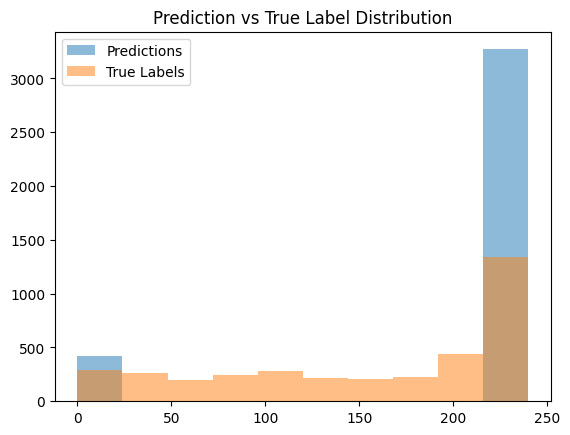

In [37]:
import matplotlib.pyplot as plt

# Compare predictions and true labels
model.eval()
with torch.no_grad():
    out = model(graph_data)
    pred = out.argmax(dim=1)

# Plot distribution of predictions
plt.hist(pred[graph_data.test_mask].cpu(), alpha=0.5, label="Predictions")
plt.hist(graph_data.y[graph_data.test_mask].cpu(), alpha=0.5, label="True Labels")
plt.legend()
plt.title("Prediction vs True Label Distribution")
plt.show()